In [4]:
from main import *
import matplotlib.pyplot as plt
import pandas
import numpy as np

## Load the database (Data.json) 

In [10]:
Data = load_data_from_api()
BindingAffinity = pandas.DataFrame()

## Extract the values we optimized towards to a dataframe based on how it was found

In [11]:
for idx in ["7Z0X", "6M0J"]:
    for seq in Data[idx]:
        if len(seq) != 70:
            continue
        BindingAffinity.at[seq, idx] = Data[idx][seq]["BindingEnergy"] # hbonds, BindingEnergy, etc
        BindingAffinity.at[seq, "src"] = Data[idx][seq]["Source"]
BindingAffinity = BindingAffinity.dropna()

## Print out how many instances we have of each

Initial (1, 3)
ML-DNN (54, 3)
ML-SVR (6, 3)
Random (126, 3)


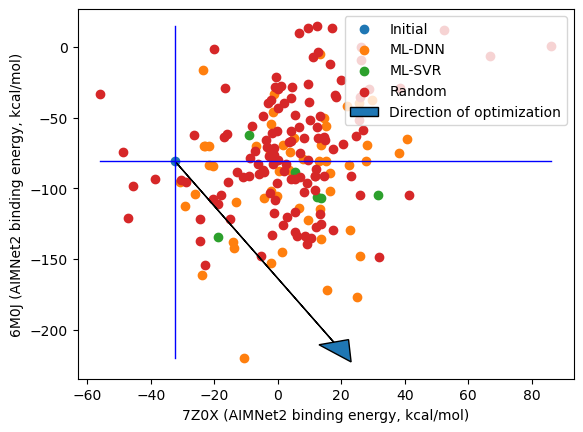

In [14]:
for src in np.unique(BindingAffinity["src"]):
    sub = BindingAffinity[BindingAffinity["src"]==src]
    plt.scatter(sub["7Z0X"], sub["6M0J"], label=src)
    print(src, sub.shape)


Initial_6M0J  = BindingAffinity[BindingAffinity["src"]=="Initial"]["6M0J"].values[0]
Initial_7Z0X  = BindingAffinity[BindingAffinity["src"]=="Initial"]["7Z0X"].values[0]

mag = np.abs(BindingAffinity["6M0J"].min()) / BindingAffinity["7Z0X"].max()
plt.arrow(Initial_7Z0X, Initial_6M0J, 50, -50*mag, head_width=10, label="Direction of optimization")
                       

plt.plot([BindingAffinity["7Z0X"].min(), BindingAffinity["7Z0X"].max()], [Initial_6M0J, Initial_6M0J], lw=1, color="blue")
plt.plot([Initial_7Z0X, Initial_7Z0X], [BindingAffinity["6M0J"].min(), BindingAffinity["6M0J"].max()], lw=1, color="blue")
plt.xlabel("7Z0X (AIMNet2 binding energy, kcal/mol)")
plt.ylabel("6M0J (AIMNet2 binding energy, kcal/mol)")
plt.legend(loc="upper right")
fig = plt.gcf()
plt.show()
fig.savefig("images/optimization.png", dpi=600)
